In [1438]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Voy a leer la información para poder trabajar con la misma.
hechos = pd.read_csv('hechos.csv')
#Me fijo primeros valores para evaluar que me trae la base de datos
hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [1439]:
import pandas as pd
#Voy a leer la información para poder trabajar con la misma.
victimas= pd.read_csv('victimas.csv')
#Me fijo primeros valores para evaluar que me trae la base de datos
victimas.head(5)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016


In [1440]:
#LIMPIEZA GENERAL DATASET "hechos"
#Veo la información general
info_general = hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

In [1441]:
#Paso a los formatos correspondiente para poder trabajar dps
hechos['FECHA'] = pd.to_datetime(hechos['FECHA'])
hechos['AAAA'] = hechos['FECHA'].dt.year
hechos['MM'] = hechos['FECHA'].dt.month
hechos['DD'] = hechos['FECHA'].dt.day
hechos['HORA'] = pd.to_datetime(hechos['HORA'], format='%H:%M:%S',errors='coerce').dt.time
pd.to_numeric(hechos['HH'], errors='coerce')
hechos['pos x']= pd.to_numeric(hechos['pos x'], errors='coerce')
hechos['pos y']= pd.to_numeric(hechos['pos y'], errors='coerce')
horas_pendientes = hechos['HORA'].isna().sum()  #solamente un solo valor es NaT


In [1442]:
# Cuento los nulos que hay en cada columna --> en altura y cruce hay nulos. Tambien en la dirección normalizada

#Me fijo lo que representa sobre el total de los datos
porcentaje_nulos = (hechos.isna().sum() / len(hechos)) * 100
print(porcentaje_nulos.round(2))

ID                        0.00
N_VICTIMAS                0.00
FECHA                     0.00
AAAA                      0.00
MM                        0.00
DD                        0.00
HORA                      0.14
HH                        0.00
LUGAR_DEL_HECHO           0.00
TIPO_DE_CALLE             0.00
Calle                     0.14
Altura                   81.47
Cruce                    24.57
Dirección Normalizada     1.15
COMUNA                    0.00
XY (CABA)                 0.00
pos x                     1.72
pos y                     1.72
PARTICIPANTES             0.00
VICTIMA                   0.00
ACUSADO                   0.00
dtype: float64


In [1443]:
#Dado que mas del 80% de los datos de la altura de la calle son nulos
#Voy a eliminar la columna porque no van a ser datos significativos.
hechos.drop(columns=['Altura'], inplace=True)

In [1444]:
#Cantidad de ACCIDENTES y de VICTIMAS POR AÑO
print("Cantidad de víctimas por año:")
accidentes_anual=hechos.groupby(['AAAA']).agg({'N_VICTIMAS':'count'})
victimas_anual=hechos.groupby(['AAAA']).agg({'N_VICTIMAS':'sum'})

print(accidentes_anual)
print(victimas_anual)

Cantidad de víctimas por año:
      N_VICTIMAS
AAAA            
2016         144
2017         131
2018         143
2019         103
2020          78
2021          97
      N_VICTIMAS
AAAA            
2016         146
2017         140
2018         149
2019         104
2020          81
2021          97


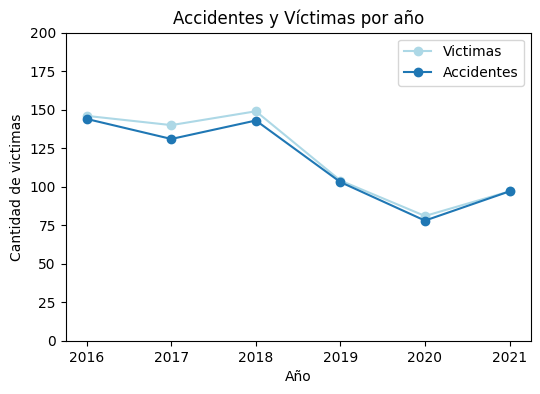

In [1445]:
#Cantidad de ACCIDENTES Y de VICTIMAS POR AÑO
victimas_anual=hechos.groupby(['AAAA']).agg({'N_VICTIMAS':'sum'})
#Necesito que todos los valores pasen a columnas, por lo tanto voy a resetar el indice para realizar el grafico dps.
#Asi obtengo el año en una columna.
victimas_anual = victimas_anual.reset_index()

accidentes_anual=hechos.groupby(['AAAA'], as_index=False).agg({'N_VICTIMAS':'count'})
#con as_index=False no necesito resetear el indice, y puedo usarlo directamente

# Cre0 el gráfico de línea
plt.figure(figsize=(6, 4))

x1=victimas_anual.AAAA
y1=victimas_anual.N_VICTIMAS
x2=accidentes_anual.AAAA
y2=accidentes_anual.N_VICTIMAS

plt.plot(x1, y1,marker='o', linestyle='-',color='lightblue', label='Victimas')
plt.plot(x2, y2,marker='o', linestyle='-', label='Accidentes')
plt.title('Accidentes y Víctimas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de victimas')
plt.ylim(0, 200)
plt.legend()
plt.show()

#En el año 2020 hubo menos víctimas dado que fue la pandemia y hubo menos movimiento en las calles.


In [1446]:
#VICTIMAS PROMEDIO POR ACCIDENTE
print(F"Víctimas promedio por accidente: {round(hechos.N_VICTIMAS.mean(),2)}")

#VICTIMAS PROMEDIO POR AÑO
print("Cantidad de víctimas promedio por año:")
print(hechos.groupby(['AAAA'],as_index=False).agg({'N_VICTIMAS':'mean'}).round(2))

Víctimas promedio por accidente: 1.03
Cantidad de víctimas promedio por año:
   AAAA  N_VICTIMAS
0  2016        1.01
1  2017        1.07
2  2018        1.04
3  2019        1.01
4  2020        1.04
5  2021        1.00


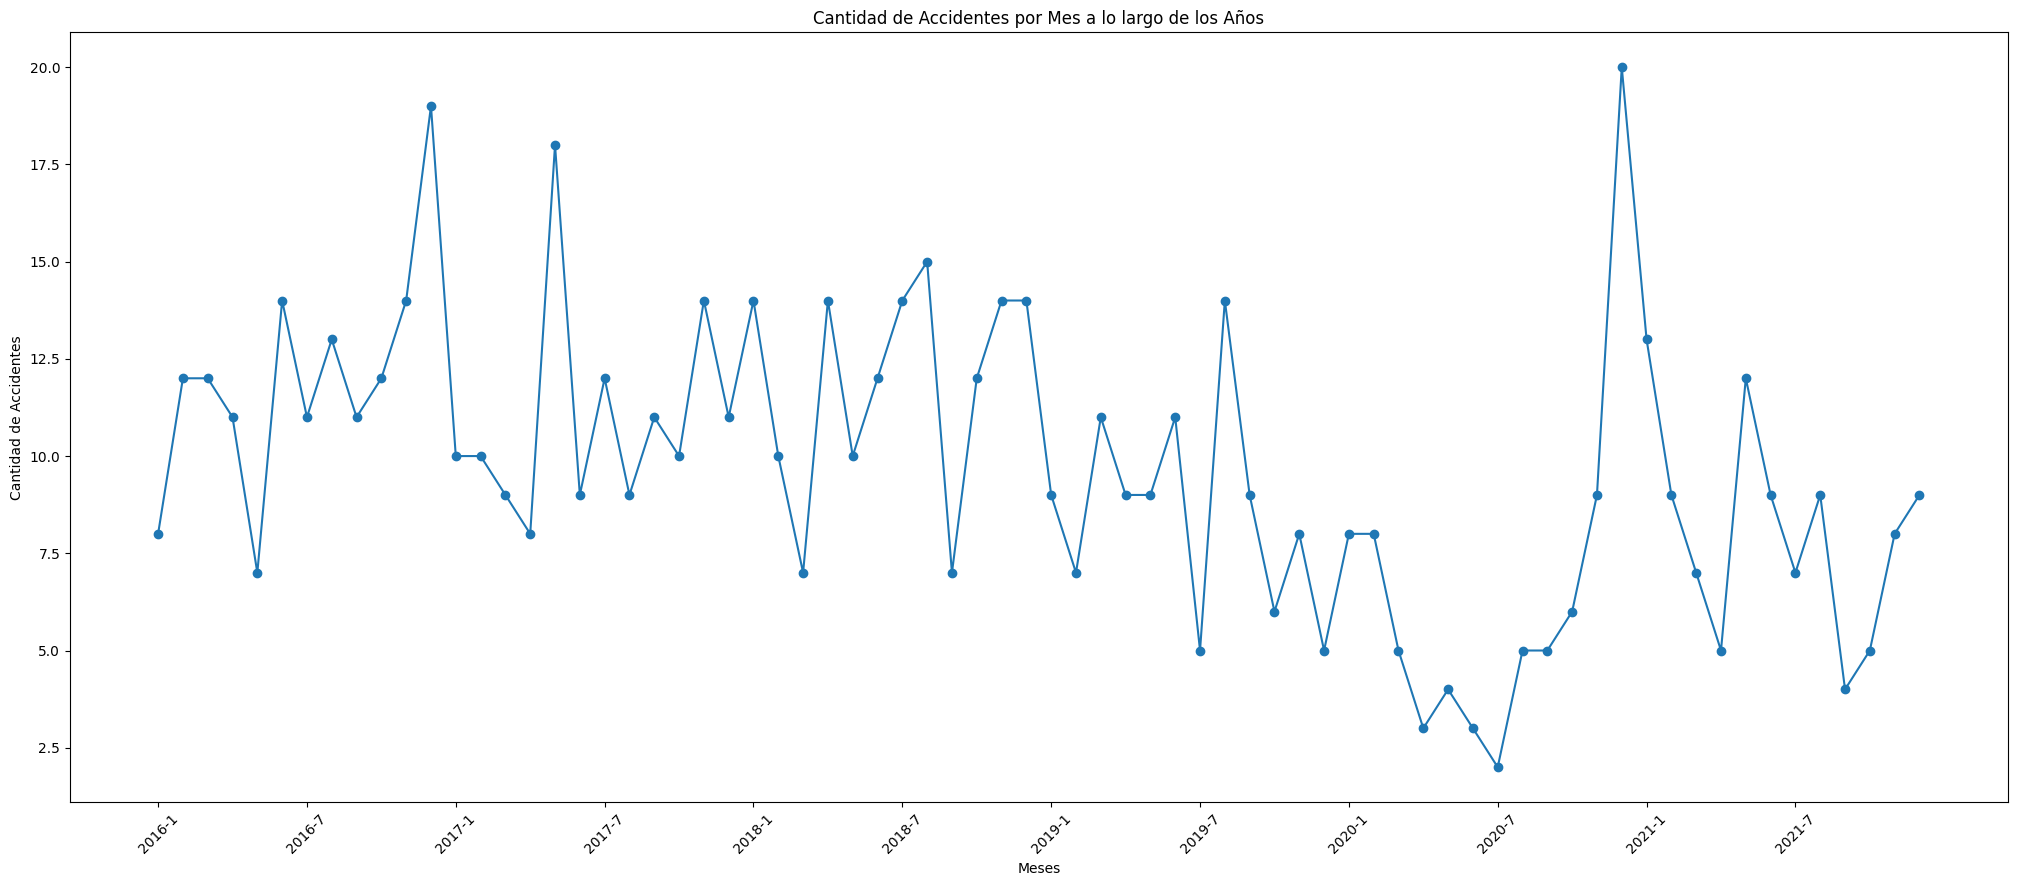

In [1447]:
#Agrupo los accidentes por fechapor año y mes y calcular la cantidad de accidentes
#accidentes_anual_mensual = hechos.groupby(hechos['FECHA'], as_index=False).agg({'N_VICTIMAS':'count'})

# Agrupo por AÑO y MES y calcular la cantidad de accidentes
accidentes_anual_mensual = hechos.groupby(['AAAA', 'MM']).size().reset_index(name='N_ACCIDENTES')

#Creo una nueva columna con el año y el mes combinados nuevamente
accidentes_anual_mensual['AAAA_MM'] = accidentes_anual_mensual['AAAA'].astype(str) + '-' + accidentes_anual_mensual['MM'].astype(str)


# Crear el gráfico de línea
plt.figure(figsize=(25, 10))

x=accidentes_anual_mensual['AAAA_MM']
y=accidentes_anual_mensual['N_ACCIDENTES']

# Graficar la cantidad de accidentes a lo largo de los meses
plt.plot(x,y, marker='o', linestyle='-')

plt.title('Cantidad de Accidentes por Mes a lo largo de los Años')
plt.xlabel('Meses')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(x[::6], labels=x[::6], rotation=45)   # Muestra una etiqueta cada seis posiciones y rota las etiquetas del eje x para una mejor visualización

plt.show()

#Se observan algunos picos.


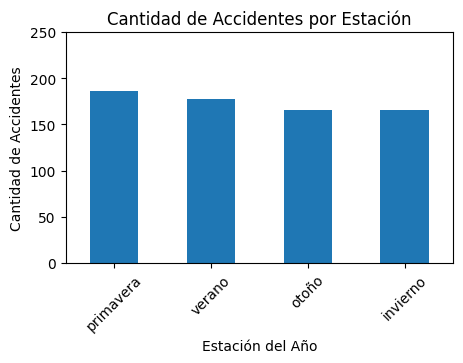

In [1448]:
# ANALIZO ACCIDENTES POR ESTACIÓN DEL AÑO
# Creo la funcion que me va a indicar la estación del año según corresponda

def obtener_estacion(fecha):
    # Extraer el mes y el día de la fecha
    mes = fecha.month
    dia = fecha.day
    
    # Verano: 21 de diciembre a 20 de marzo
    if (mes == 12 and dia >= 21) or (mes in [1, 2] or (mes == 3 and dia <= 20)):
        return 'verano'
    # Otoño: 21 de marzo a 20 de junio
    elif (mes == 3 and dia >= 21) or (mes in [4, 5] or (mes == 6 and dia <= 20)):
        return 'otoño'
    # Invierno: 21 de junio a 20 de septiembre
    elif (mes == 6 and dia >= 21) or (mes in [7, 8] or (mes == 9 and dia <= 20)):
        return 'invierno'
    # Primavera: 21 de septiembre a 20 de diciembre
    elif (mes == 9 and dia >= 21) or (mes in [10, 11] or (mes == 12 and dia <= 20)):
        return 'primavera'

#Aplico la funcion a todo el dataframe, creando la columna "ESTACION"
hechos["ESTACION"] = hechos['FECHA'].apply(obtener_estacion)

accidentes_por_estacion = hechos['ESTACION'].value_counts()
# Crear el gráfico de barras
plt.figure(figsize=(5, 3))
grafico_estaciones=accidentes_por_estacion.plot(kind='bar')
plt.title('Cantidad de Accidentes por Estación')
plt.xlabel('Estación del Año')
plt.ylabel('Cantidad de Accidentes')
plt.ylim(0, 250)
plt.xticks(rotation=45)  # Roto las etiquetas del eje x para una mejor visualización
plt.show()

#Los accidentes no tienen grandes variaciones entre las diferentes estaciones del año.

Text(0.5, 1.0, 'Accidentes por Comuna')

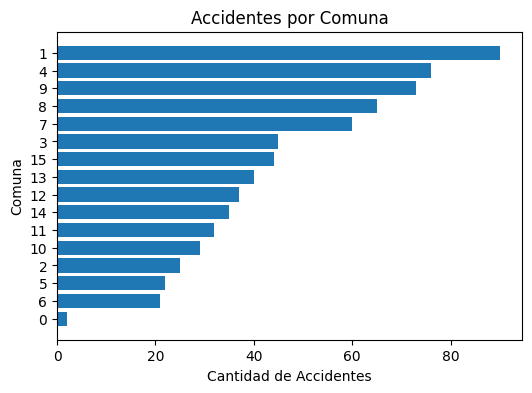

In [1449]:
#Evaluo la CANITDAD DE ACCIDENTES POR COMUNA
#La mayoría de los hechos ocurren en la comuna 1 
accidentes_comuna=hechos.groupby(['COMUNA'],as_index=False).agg({'ID':'count'})

accidentes_comuna = accidentes_comuna.sort_values(by='ID', ascending=False)

plt.figure(figsize=(6, 4))  # Tamaño del gráfico
plt.barh(accidentes_comuna['COMUNA'].astype(str), accidentes_comuna['ID'])  # Creo el gráfico
plt.gca().invert_yaxis() #Invierto el orden del grafico y muestro las columnas con más accidentes.

plt.xlabel('Cantidad de Accidentes') 
plt.ylabel('Comuna')  
plt.title('Accidentes por Comuna')


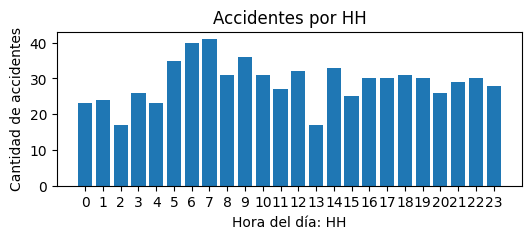

In [1450]:
#Evaluo la CANITDAD DE ACCIDENTES POR HH

# Agrupar por hora del día y contar la cantidad de accidentes en cada hora
accidentes_HH = hechos.groupby('HH').agg({'N_VICTIMAS':'count'}).reset_index()
#print(accidentes_HH)

accidentes_HH.HH= pd.to_numeric(accidentes_HH.HH, errors='coerce')
accidentes_HH = accidentes_HH.dropna(subset=['HH']) #Descarto los valores que no tienen la hora 

accidentes_HH["HH"]=accidentes_HH["HH"].astype(int)

# Ordeno los valores por hora del dia
accidentes_HH = accidentes_HH.sort_values(by='HH')

# Crear el gráfico de barras
plt.figure(figsize=(6, 2))  # Tamaño del gráfico
plt.bar(accidentes_HH.HH, accidentes_HH.N_VICTIMAS)  # Crear el gráfico de barras
plt.xlabel('Hora del día: HH')  # Etiqueta del eje x
plt.ylabel('Cantidad de accidentes')  # Etiqueta del eje y
plt.title('Accidentes por HH')  # Título del gráfico
plt.xticks(range(24)) 
plt.show()  # Mostrar el gráfico


/var/folders/lh/p6j3glj52sq44ch3v_6_hltc0000gn/T/ipykernel_36757/2506278453.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hechos_validos['HH'] = hechos_validos['HH'].astype(int)
/var/folders/lh/p6j3glj52sq44ch3v_6_hltc0000gn/T/ipykernel_36757/2506278453.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hechos_validos["FRANJA_HORARIA"] = hechos_validos['HH'].apply(franja)


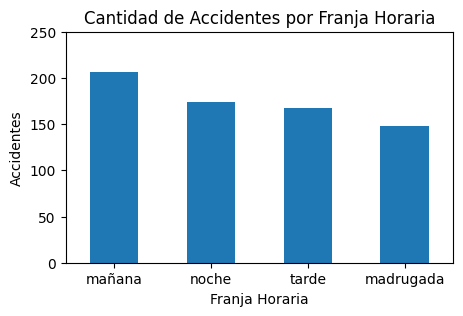

In [1451]:
# ANALIZO ACCIDENTES POR MOMENTO DEL DÍA
# Creo la funcion que me va a indicar el momento del día: MADRUGRADA/MAÑANA/TARDE/NOCHE
#Voy a considerar los siguientes momentos del día:
#Madrugada: 00:00 - 06:00
#Mañana: 06:00 - 12:00
#Tarde: 12:00 - 18:00
#Noche: 18:00 - 00:00

def franja(hh):
    # Extraer el mes y el día de la fecha
    hora = hh    
    if (hora >= 0 and hora < 6):
        return 'madrugada'
    elif (hora >= 6 and hora < 12):
        return 'mañana'
    elif(hora >= 12 and hora < 18):
        return 'tarde'
    elif (hora >= 18 and hora < 24):
        return 'noche'
    else:
        return "SD"

# Filtro valores no válidos (que no se pueden convertir a enteros)

hechos_validos= hechos[hechos['HH'].str.isdigit()]
hechos_validos['HH'] = hechos_validos['HH'].astype(int)
hechos_validos["FRANJA_HORARIA"] = hechos_validos['HH'].apply(franja)

franja_horaria = hechos_validos["FRANJA_HORARIA"].value_counts()
# Crear el gráfico de barras
plt.figure(figsize=(5, 3))
franja_horaria=franja_horaria.plot(kind='bar')
plt.title('Cantidad de Accidentes por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Accidentes')
plt.ylim(0, 250)
plt.xticks(rotation=0) 
plt.show()

In [1452]:
#LIMPIEZA GENERAL DATASET "victimas"

#Elimino las columnas repetidas en ambos datasets: fecha, AAAA, MM, DD, Y VICTIMA
victimas.drop(columns=['FECHA','AAAA','MM','DD','VICTIMA'], inplace=True)
victimas.head(5)

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MASCULINO,19,1/1/2016
1,2016-0002,CONDUCTOR,MASCULINO,70,1/2/2016
2,2016-0003,CONDUCTOR,MASCULINO,30,1/3/2016
3,2016-0004,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,2/1/2016


In [1453]:
#Convierto la edad a tipo de dato numerico
victimas['EDAD']= pd.to_numeric(victimas['EDAD'], errors='coerce')

In [1454]:
#Paso las fechas al formato correspondiente para poder trabajar luego con ellas
victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(victimas['FECHA_FALLECIMIENTO'],errors='coerce')
victimas['FECHA_FALLECIMIENTO'].head(5)
victimas.head(3)

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03


In [1455]:
#Me fijo lo que representa sobre el total de los datos (CALCULAR PORCENTAJES)
porcentaje_nulos = (victimas.isna().sum() / len(victimas)) * 100
print(porcentaje_nulos.round(2))

#El 7% de los datos no tienen la información de la edad
#Casi el 10% se los datos no tiene la fecha de fallecimiento -> voy a asumir que son sobrevivientes

ID_hecho               0.00
ROL                    0.00
SEXO                   0.00
EDAD                   7.39
FECHA_FALLECIMIENTO    9.62
dtype: float64


In [1456]:
#Veo las información estadística de las métricas
round(victimas.describe(),1)

,EDAD,FECHA_FALLECIMIENTO
count,664.0,648
mean,42.2,2018-11-23 10:55:33.333333248
min,1.0,2016-01-01 00:00:00
25%,27.0,2017-07-26 12:00:00
50%,37.0,2018-09-21 00:00:00
75%,56.2,2020-03-06 00:00:00
max,95.0,2022-01-03 00:00:00
std,19.8,NaN


In [1457]:
#Voy a contar la cantidad total de victimas
#Cuando no encuentre fecha de fallecimiento, asumo que la victima sobrevivió
victimas_totales = victimas.shape[0]
print(f"Cantidad de victimas totales: {victimas_totales}")
victimas_sobrevivientes =victimas['FECHA_FALLECIMIENTO'].isna().sum()  
print(f"Cantidad de victimas que sobrevivieron: {victimas_sobrevivientes}")
print(f"Porcentaje de víctimas fallecidas {(victimas_sobrevivientes/victimas_totales).round(3)*100}%")
victimas_fallecidas= 1-(victimas_sobrevivientes/victimas_totales)
print(f"Porcentaje de víctimas fallecidas {victimas_fallecidas.round(3)*100}%")

Cantidad de victimas totales: 717
Cantidad de victimas que sobrevivieron: 69
Porcentaje de víctimas fallecidas 9.6%
Porcentaje de víctimas fallecidas 90.4%


In [1458]:
#Igualo el nombre de la columna ID en cada caso, que hace referencia al ID del hecho
hechos.rename(columns={'ID': 'ID_hecho'}, inplace=True)

hechos.head(5)
victimas.head(5)

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03
3,2016-0004,CONDUCTOR,MASCULINO,18.0,NaT
4,2016-0005,CONDUCTOR,MASCULINO,29.0,2016-02-01


In [1459]:
#CONSOLIDO LA INFORMACIÓN DE AMBOS DATASETS
datos_concat = pd.merge(victimas, hechos, on='ID_hecho', how='inner')

In [1460]:
datos_concat = datos_concat.reset_index(drop=True)
datos_concat.head(5)

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA,AAAA,MM,DD,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ESTACION
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01,1,2016-01-01,2016,1,1,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,verano
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02,1,2016-01-02,2016,1,2,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,verano
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03,1,2016-01-03,2016,1,3,...,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,verano
3,2016-0004,CONDUCTOR,MASCULINO,18.0,NaT,1,2016-01-10,2016,1,10,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,verano
4,2016-0005,CONDUCTOR,MASCULINO,29.0,2016-02-01,1,2016-01-21,2016,1,21,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,verano


In [1461]:
datos_concat.head(5)
datos_concat.to_csv("siniestros_final.csv",index=False)

In [1462]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_csv('siniestros_final.csv')
data.head(3)

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA,AAAA,MM,DD,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ESTACION
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01,1,2016-01-01,2016,1,1,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,verano
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02,1,2016-01-02,2016,1,2,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,verano
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03,1,2016-01-03,2016,1,3,...,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,verano


In [1463]:
print(data.dtypes)

ID_hecho                  object
ROL                       object
SEXO                      object
EDAD                     float64
FECHA_FALLECIMIENTO       object
N_VICTIMAS                 int64
FECHA                     object
AAAA                       int64
MM                         int64
DD                         int64
HORA                      object
HH                        object
LUGAR_DEL_HECHO           object
TIPO_DE_CALLE             object
Calle                     object
Cruce                     object
Dirección Normalizada     object
COMUNA                     int64
XY (CABA)                 object
pos x                    float64
pos y                    float64
PARTICIPANTES             object
VICTIMA                   object
ACUSADO                   object
ESTACION                  object
dtype: object


In [1464]:
datos_numericos = data.select_dtypes(include=[np.number])
datos_numericos.dtypes

EDAD          float64
N_VICTIMAS      int64
AAAA            int64
MM              int64
DD              int64
COMUNA          int64
pos x         float64
pos y         float64
dtype: object

In [1465]:
#Observo la edad promedio de las victimas:
print(f"Edad promedio de las victimas: {int(datos_numericos.EDAD.mean())}")
#Observo la desviacion estandar de la EDAD:
print(f"Desviacion estandar de Edad: {round(datos_numericos.EDAD.std(),1)}")
#Como la desviacion estandar es grande, vamos a ver la variacion en las edades:
print(f"Edad de la victima más jóven: {int(datos_numericos.EDAD.min())}")
print(f"Edad de la victima más grande: {int(datos_numericos.EDAD.max())}")

Edad promedio de las victimas: 42
Desviacion estandar de Edad: 19.8
Edad de la victima más jóven: 1
Edad de la victima más grande: 95


In [1466]:
#Observo el promedio de las victimas:
print(f"Numeros de victimas promedio: {round(datos_numericos.N_VICTIMAS.mean(),2)}")

#Observo la desviacion estandar del numero de victimas:
print(f"Desviacion estandar de  victimas: {round(datos_numericos.N_VICTIMAS.std(),2)}")

Numeros de victimas promedio: 1.06
Desviacion estandar de  victimas: 0.26


In [1467]:
#Evaluo correlaciones entre diferentes variables 
pearson_corr = datos_numericos.corr(method='pearson')
print(pearson_corr)

                EDAD  N_VICTIMAS      AAAA        MM        DD    COMUNA  \
EDAD        1.000000   -0.091452  0.093021  0.022526  0.008836 -0.056974   
N_VICTIMAS -0.091452    1.000000 -0.070402 -0.018718  0.023851 -0.006149   
AAAA        0.093021   -0.070402  1.000000 -0.039499 -0.041482  0.017353   
MM          0.022526   -0.018718 -0.039499  1.000000 -0.025913  0.058184   
DD          0.008836    0.023851 -0.041482 -0.025913  1.000000 -0.000123   
COMUNA     -0.056974   -0.006149  0.017353  0.058184 -0.000123  1.000000   
pos x       0.057498    0.000312  0.012594 -0.080419 -0.029651 -0.683747   
pos y       0.067812   -0.012061  0.060793 -0.000157 -0.035486  0.337389   

               pos x     pos y  
EDAD        0.057498  0.067812  
N_VICTIMAS  0.000312 -0.012061  
AAAA        0.012594  0.060793  
MM         -0.080419 -0.000157  
DD         -0.029651 -0.035486  
COMUNA     -0.683747  0.337389  
pos x       1.000000  0.072254  
pos y       0.072254  1.000000  


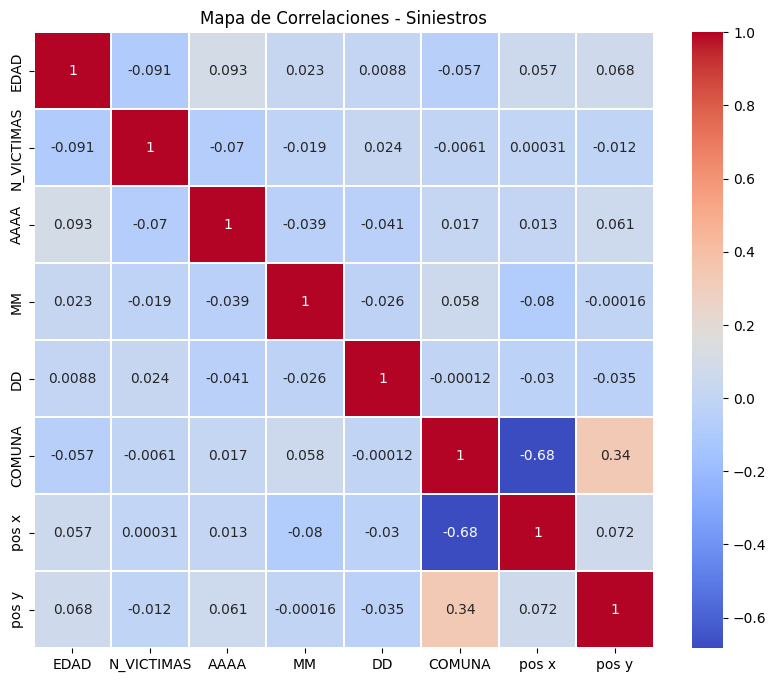

In [1468]:
#Visualizacion mejor con mapa de correlación
matriz_corr = datos_numericos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Mapa de Correlaciones - Siniestros')
plt.show()

#No parece haber correlación fuerte entre las diferentes variables consideradas
#En todos los casos la correlacion es debil


In [1469]:
#Me fijo el porcentaje de nulos representa sobre el total de los datos
porcentaje_nulos = (data.isna().sum() / len(data)) * 100
print(porcentaje_nulos.round(2))

#Falta información del cruce en el 25% de los datos

ID_hecho                  0.00
ROL                       0.00
SEXO                      0.00
EDAD                      7.39
FECHA_FALLECIMIENTO       9.62
N_VICTIMAS                0.00
FECHA                     0.00
AAAA                      0.00
MM                        0.00
DD                        0.00
HORA                      0.14
HH                        0.00
LUGAR_DEL_HECHO           0.00
TIPO_DE_CALLE             0.00
Calle                     0.14
Cruce                    24.69
Dirección Normalizada     1.26
COMUNA                    0.00
XY (CABA)                 0.00
pos x                     1.81
pos y                     1.81
PARTICIPANTES             0.00
VICTIMA                   0.00
ACUSADO                   0.00
ESTACION                  0.00
dtype: float64


SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64


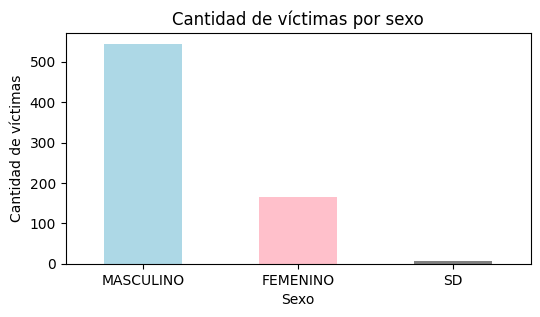

In [1470]:

#Voy a ver la cantidad de victimas que hay por sexo.
#Los valores que tienen SD no tienen dato.
victimas_sexo = data['SEXO'].value_counts()
print(data['SEXO'].value_counts())

plt.figure(figsize=(6, 3))
victimas_sexo.plot(kind='bar', color=['lightblue','pink','grey'])
plt.xlabel('Sexo')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas por sexo')
plt.xticks(rotation=0)
plt.show()


Text(0.5, 1.0, 'Edad de Víctimas en Siniestros Viales')

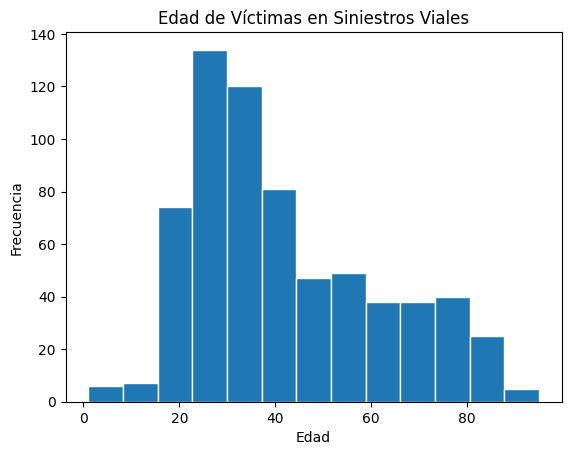

In [1471]:
#Histograma
#Voy a ver la frecuencia de edad de las victimas 
numero_victimas = data['EDAD']
plt.hist(numero_victimas, bins=13, edgecolor='white') # Elige el número de bins apropiado
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Edad de Víctimas en Siniestros Viales')

#La mayoría de las victimas tienen entre 20 y 30 años

/var/folders/lh/p6j3glj52sq44ch3v_6_hltc0000gn/T/ipykernel_36757/656587601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SEXO', y='EDAD', data=data, palette='muted')


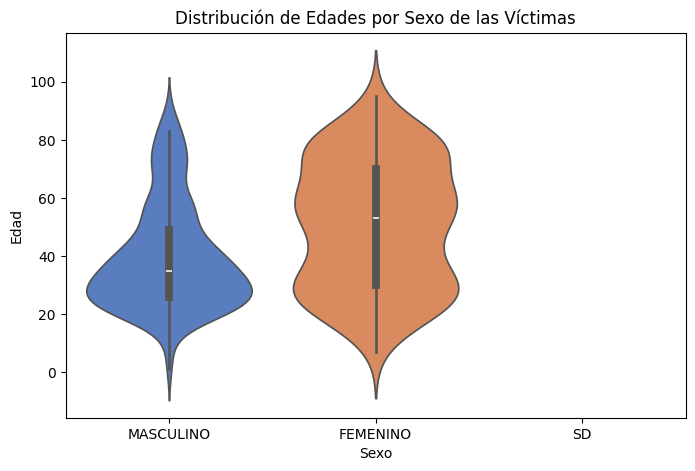

In [1472]:
#Evaluo la distribución de edades por sexo de víctimas.
#Veo si hay diferencias en la distribución de edades entre hombres y mujeres víctimas de siniestros
#Las victimas de sexo masculino tienen edad promedio menor a las victimas de sexo femenino. (SD no aplica)

plt.figure(figsize=(8, 5))
sns.violinplot(x='SEXO', y='EDAD', data=data, palette='muted')
plt.title('Distribución de Edades por Sexo de las Víctimas')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()

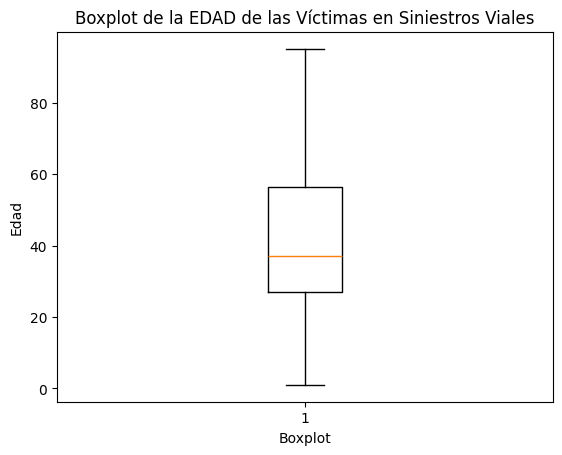

EDAD PROMEDIO o la MEDIA de las victimas es: 42
MIN EDAD de las victimas: 1
MAX EDAD de las victimas: 95
MEDIANA de la edad de las victimas es: 37 ( o Cuartil 2)
MODA: edad que mas se repite en las victimas: 30
Primer cuartil: 27 
Tercer cuartil: 56 
Rango intercuartilico: 29.25 
Bigote inferior: -16.875 
Bigote superior: 100 


/var/folders/lh/p6j3glj52sq44ch3v_6_hltc0000gn/T/ipykernel_36757/3947293754.py:24: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  moda=int(data_sin_nulos['EDAD'].mode())


In [1473]:
#BOXPLOT
#Voy a hacer el grafico de cajas con la edad
#Elimino los nulos para poder realizarlo sin problemas
data_sin_nulos= data.dropna(subset=['EDAD'])
data_sin_nulos['EDAD']

plt.boxplot(data_sin_nulos['EDAD'])
plt.xlabel('Boxplot')
plt.ylabel('Edad')
plt.title('Boxplot de la EDAD de las Víctimas en Siniestros Viales')
plt.show()

#La caja representa la variabilidad del conjunto de los datos 
#La amplitud de la caja representa el rango intercuartil

#Calculo la edad promedio
promedio=np.mean(data_sin_nulos['EDAD'])
#Calculo el minimo
minimo=data_sin_nulos['EDAD'].min()
#Calculo el minimo
maximo=data_sin_nulos['EDAD'].max()
#Calculo la mediana: valor que divide el conjunto de datos en dos partes iguales
mediana = data_sin_nulos['EDAD'].median()
moda=int(data_sin_nulos['EDAD'].mode())
q1 = data_sin_nulos['EDAD'].quantile(0.25)
q3 = data_sin_nulos['EDAD'].quantile(0.75)
iqr = q3 - q1
bigote_inferior = data_sin_nulos['EDAD'].quantile(0.25) - 1.5 * iqr
bigote_superior= data_sin_nulos['EDAD'].quantile(0.75) + 1.5 * iqr

print(f"EDAD PROMEDIO o la MEDIA de las victimas es: {int(promedio)}")
print(f"MIN EDAD de las victimas: {int(minimo)}")
print(f"MAX EDAD de las victimas: {int(maximo)}")
print(f"MEDIANA de la edad de las victimas es: {int(mediana)} ( o Cuartil 2)")
print(f"MODA: edad que mas se repite en las victimas: {int(moda)}")
print(f"Primer cuartil: {int(q1)} ")
print(f"Tercer cuartil: {int(q3)} ")
print(f"Rango intercuartilico: {iqr} ")
print(f"Bigote inferior: {bigote_inferior} ") 
print(f"Bigote superior: {int(bigote_superior)} ")
#Todas las edades estan entre el bigote inferior y el superior. No hay outliers.